EDA

In [185]:

# Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import scipy as sp
import scipy.optimize as spo
from scipy import stats

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import category_encoders as ce
import itertools
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
data_read = pd. read_csv('C:\work_me_code\A_final\cleaned_data.csv')
data_read.head()

,status,street,baths,city,sqft,zipcode,state,target,Pool,Type,Year_built,school_dist_min
0,Active,240 Heather Ln,4.0,Southern Pines,2900,28387,NC,418000,0,single_family_home,2019,2.70
1,For Sale,12911 E Heroy Ave,3.0,Spokane Valley,1947,99216,WA,310000,0,single_family_home,2019,1.01
2,For Sale,2005 Westridge Rd,2.0,Los Angeles,3000,90049,CA,2895000,1,single_family_home,1961,1.19
3,For Sale,4311 Livingston Ave,8.0,Dallas,6457,75205,TX,2395000,0,single_family_home,2006,0.10
4,For Sale,1624 S Newkirk St,0.0,Philadelphia,897,19145,PA,209000,0,townhouse,1920,-1.00


In [3]:
data = data_read.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330578 entries, 0 to 330577
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           330578 non-null  object 
 1   street           330578 non-null  object 
 2   baths            330578 non-null  float64
 3   city             330578 non-null  object 
 4   sqft             330578 non-null  int64  
 5   zipcode          330578 non-null  int64  
 6   state            330578 non-null  object 
 7   target           330578 non-null  int64  
 8   Pool             330578 non-null  int64  
 9   Type             330578 non-null  object 
 10  Year_built       330578 non-null  object 
 11  school_dist_min  330578 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 30.3+ MB


Можем заметить, что при подгрузке данных, признак zipcode стал числовым, это некоррктно, так как это почтовый индекс.

In [4]:
data['zipcode'] = data['zipcode'].astype(str)

In [5]:
#Признак  street, дает мало информации, его можно использовать для добавлении новых данных, например, которые содержаться в этом районе (экологичность, новый или старый район и т.д.)
# удалим признак street
data = data.drop(columns=['street'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330578 entries, 0 to 330577
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           330578 non-null  object 
 1   baths            330578 non-null  float64
 2   city             330578 non-null  object 
 3   sqft             330578 non-null  int64  
 4   zipcode          330578 non-null  object 
 5   state            330578 non-null  object 
 6   target           330578 non-null  int64  
 7   Pool             330578 non-null  int64  
 8   Type             330578 non-null  object 
 9   Year_built       330578 non-null  object 
 10  school_dist_min  330578 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 27.7+ MB


In [8]:
# Составим список категориальных признаков:
cat = ['status','city','zipcode','state','Type','Year_built']
 
# Составим список числовых признаков:
num = ['baths', 'sqft', 'target', 'school_dist_min']

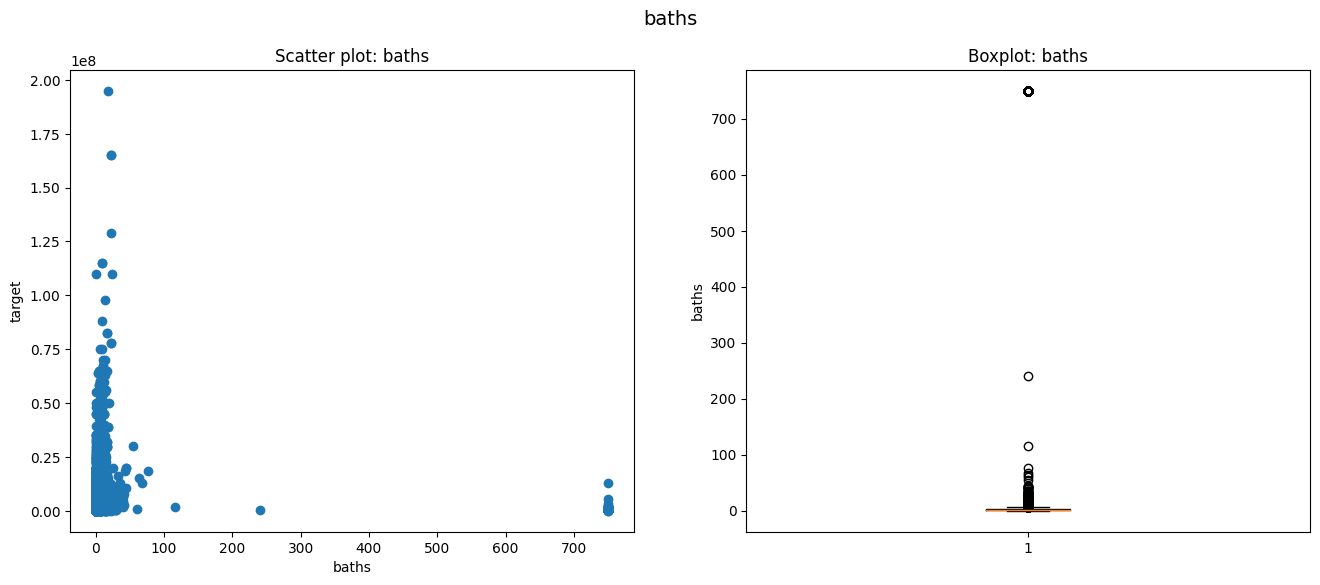

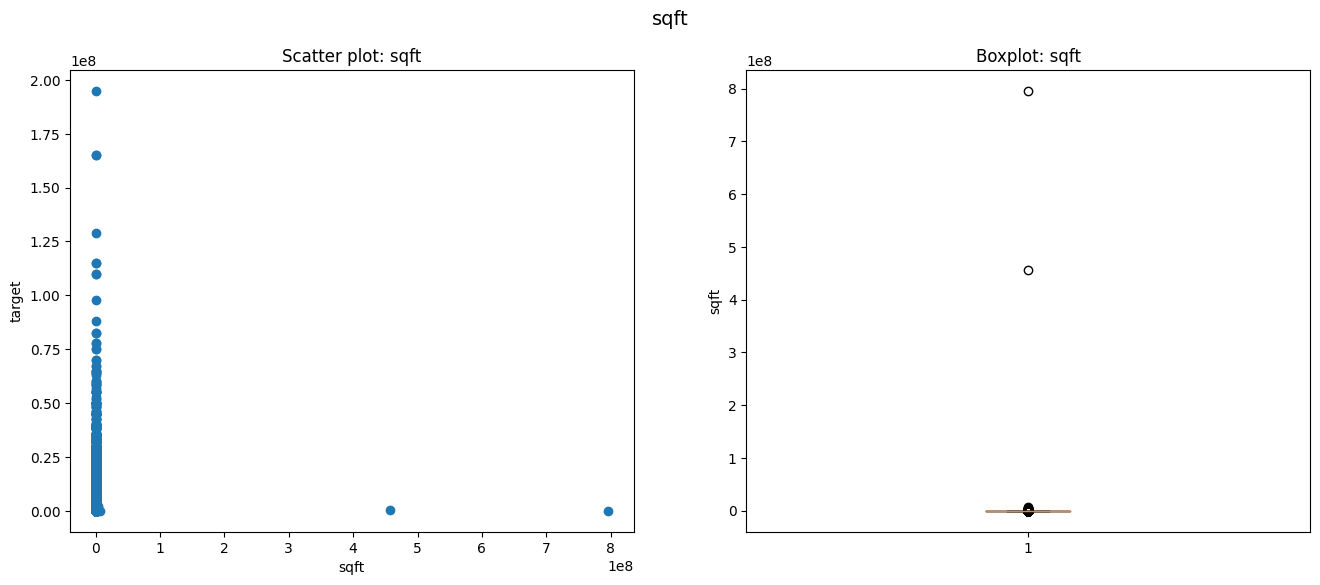

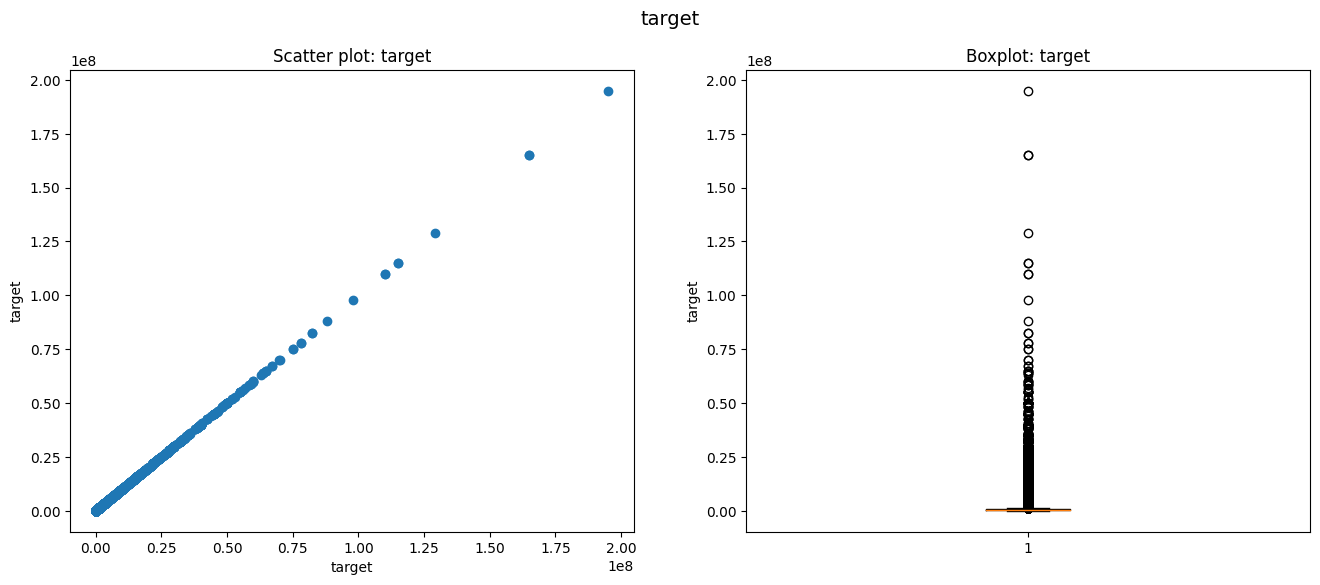

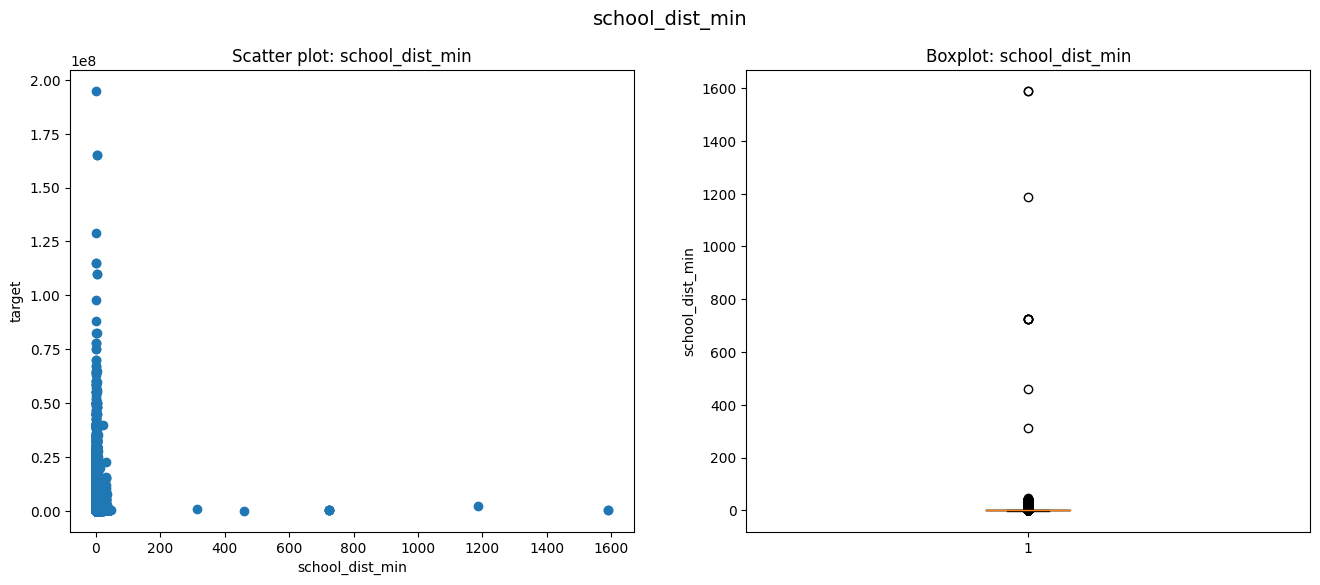

In [10]:
# Создание графика рассеивания и ящика с усами для каждого признака
for feature in num:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle(f'{feature}', fontsize=14)

    # График рассеивания
    ax1.scatter(data[feature], data['target'])
    ax1.set_title(f'Scatter plot: {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('target')

    # Ящик с усами
    ax2.boxplot(data[feature])
    ax2.set_title(f'Boxplot: {feature}')
    ax2.set_ylabel(feature)

    plt.show()
    
    

Признак Baths

Проанализировав данные в открытых источникх, было обнаруженно, что домов больше 100 ванных комнат не существует. Поэтому мы можем избавиться от этих выбрсов.

In [109]:
data_c = data.copy()
data_c = data_c[data_c['baths']<100]
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330339 entries, 0 to 330577
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           330339 non-null  object 
 1   baths            330339 non-null  float64
 2   city             330339 non-null  object 
 3   sqft             330339 non-null  int64  
 4   zipcode          330339 non-null  object 
 5   state            330339 non-null  object 
 6   target           330339 non-null  int64  
 7   Pool             330339 non-null  int64  
 8   Type             330339 non-null  object 
 9   Year_built       330339 non-null  object 
 10  school_dist_min  330339 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 30.2+ MB


C:\Users\1\AppData\Local\Temp\ipykernel_17884\2188133677.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_c['baths'], hist=True, kde=False,


Text(0, 0.5, 'count')

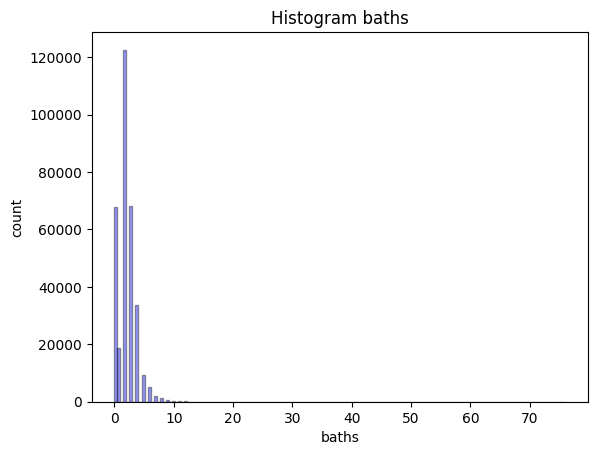

In [110]:
# seaborn histogram
sns.distplot(data_c['baths'], hist=True, kde=False, 
             bins=int(150), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram baths')
plt.ylabel('count')

In [111]:
# формируем нулевую и альтернативную гипотезы для проверки данных на нормальность
H0 = 'Данные распределены нормально'
H1 = 'Распределение отлично от нормального'

# устанавливаем уровень значимости
alpha = 0.05

# тест Д'Агостино (возвращает двустороннюю вероятность для проверки гипотезы)
_, p = stats.normaltest(data_c['baths'])
print(f'P-value = {round(p, 2)}')

# интерпритация полученного результата
if p > alpha / 2: # p-value рассчитано для двусторонней гипотезы, поэтому уровень значимости делим на 2
    print(H0)
else:
    print(H1)

P-value = 0.0
Распределение отлично от нормального


Необходимо нормализовать признак.

Признак sqft

Из выше приведенных графиков, можно обнаружить выбросы, нужно их проанализировать.

In [112]:
data_c[data_c['sqft']>4000000]

,status,baths,city,sqft,zipcode,state,target,Pool,Type,Year_built,school_dist_min
45916,For Sale,0.0,Von Ormy,4356000,78073,TX,2000000,0,land,no date,4.22
55166,For Sale,2.0,Cincinnati,795979430,45225,OH,27500,0,single_family_home,1901,0.78
65205,For Sale,0.0,Laredo,7078574,78041,TX,98000,0,land,no date,2.53
124697,For Sale,0.0,Yakima,5728968,98901,WA,289000,0,land,no date,7.97
164372,For Sale,0.0,Panama,4356000,32404,FL,400000,0,land,no date,5.67
330013,Active,0.0,Glendale,456602479,42740,KY,198000,0,multi_family_home,2012,3.10


При таком большом количестве площади, очен ьмаленькая цена. Поэтому эти данные можем убрать

In [118]:
data_c = data_c[data_c['sqft']<4000000]

In [102]:
data_c[data_c['sqft'] == 0]['Type'].value_counts()

other                 3370
single_family_home    2662
condo                 1950
land                  1142
multi_family_home      821
townhouse              338
mobile_home            212
ranch                   36
modern                  27
apartment               26
miscellaneous            3
Name: Type, dtype: int64

Жилые помещения не могут не иметь площади. Уберем их.

In [113]:
ind = data_c[(data_c['sqft'] < 1)].index
data_c = data_c.drop(labels = ind ,axis = 0)
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319752 entries, 0 to 330577
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           319752 non-null  object 
 1   baths            319752 non-null  float64
 2   city             319752 non-null  object 
 3   sqft             319752 non-null  int64  
 4   zipcode          319752 non-null  object 
 5   state            319752 non-null  object 
 6   target           319752 non-null  int64  
 7   Pool             319752 non-null  int64  
 8   Type             319752 non-null  object 
 9   Year_built       319752 non-null  object 
 10  school_dist_min  319752 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 29.3+ MB


C:\Users\1\AppData\Local\Temp\ipykernel_17884\1878464975.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_c['sqft'], hist=True, kde=False,


Text(0, 0.5, 'count')

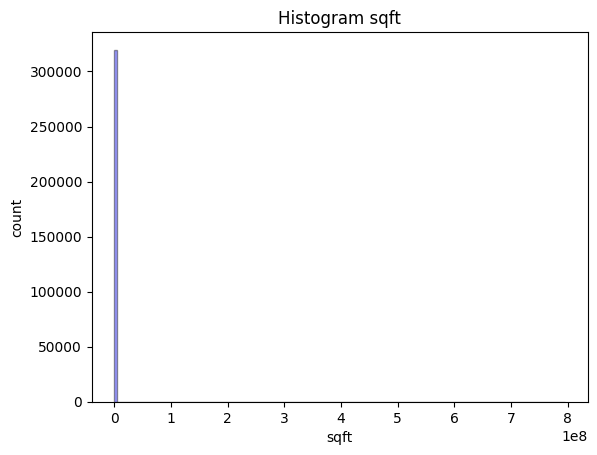

In [114]:
# seaborn histogram
sns.distplot(data_c['sqft'], hist=True, kde=False, 
             bins=int(150), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram sqft')
plt.ylabel('count')

Необходимо нормализовать признак.

Признак school_dist_min

Из выше приведенных графиков, можно обнаружить выбросы, нужно их проанализировать.

In [105]:
data_c[data_c['school_dist_min']>200]

,status,baths,city,sqft,zipcode,state,target,Pool,Type,Year_built,school_dist_min
23286,Other,4.0,Falcon Heights,6000,78545,TX,670000,0,single_family_home,1980,312.40
96599,For Sale,0.0,Santa Ana,890,92703,TN,48640,0,single_family_home,1963,1590.36
148708,For Sale,0.0,Spring,720,77380,TN,18000,0,single_family_home,1950,460.86
179009,For Sale,6.0,Miami Beach,4173,33140,FL,2350000,1,single_family_home,1949,1187.14
189534,For Sale,3.0,Needmore,1230,17238,TN,57225,0,single_family_home,1953,725.17
203137,For Sale,3.0,Needmore,1230,17238,TN,57225,0,single_family_home,1950,725.21
263480,For Sale,3.0,Needmore,1230,17238,TN,57225,0,single_family_home,1950,725.20
312690,For Sale,0.0,Santa Ana,890,92703,TN,48300,1,single_family_home,1963,1590.38
313196,For Sale,3.0,Needmore,1230,17238,TN,57225,0,single_family_home,1953,725.19
325923,For Sale,3.0,Needmore,1230,17238,TN,57225,0,single_family_home,1950,725.19


Данные выглядят приемлемо, но это очень большое растояние до школы. Всего 10 данных мы можем принебречь, чтобы улучшить модель.

In [117]:
data_c = data_c[data_c['school_dist_min']<200]

C:\Users\1\AppData\Local\Temp\ipykernel_17884\4115667466.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_c['school_dist_min'], hist=True, kde=False,


Text(0, 0.5, 'count')

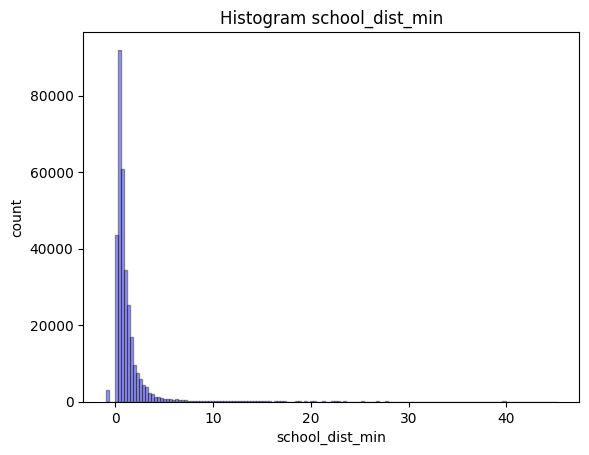

In [107]:
# seaborn histogram
sns.distplot(data_c['school_dist_min'], hist=True, kde=False, 
             bins=int(150), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram school_dist_min')
plt.ylabel('count')

In [108]:
# формируем нулевую и альтернативную гипотезы для проверки данных на нормальность
H0 = 'Данные распределены нормально'
H1 = 'Распределение отлично от нормального'

# устанавливаем уровень значимости
alpha = 0.05

# тест Д'Агостино (возвращает двустороннюю вероятность для проверки гипотезы)
_, p = stats.normaltest(data_c['school_dist_min'])
print(f'P-value = {round(p, 2)}')

# интерпритация полученного результата
if p > alpha / 2: # p-value рассчитано для двусторонней гипотезы, поэтому уровень значимости делим на 2
    print(H0)
else:
    print(H1)

P-value = 0.0
Распределение отлично от нормального


Необходимо нормализовать признак.

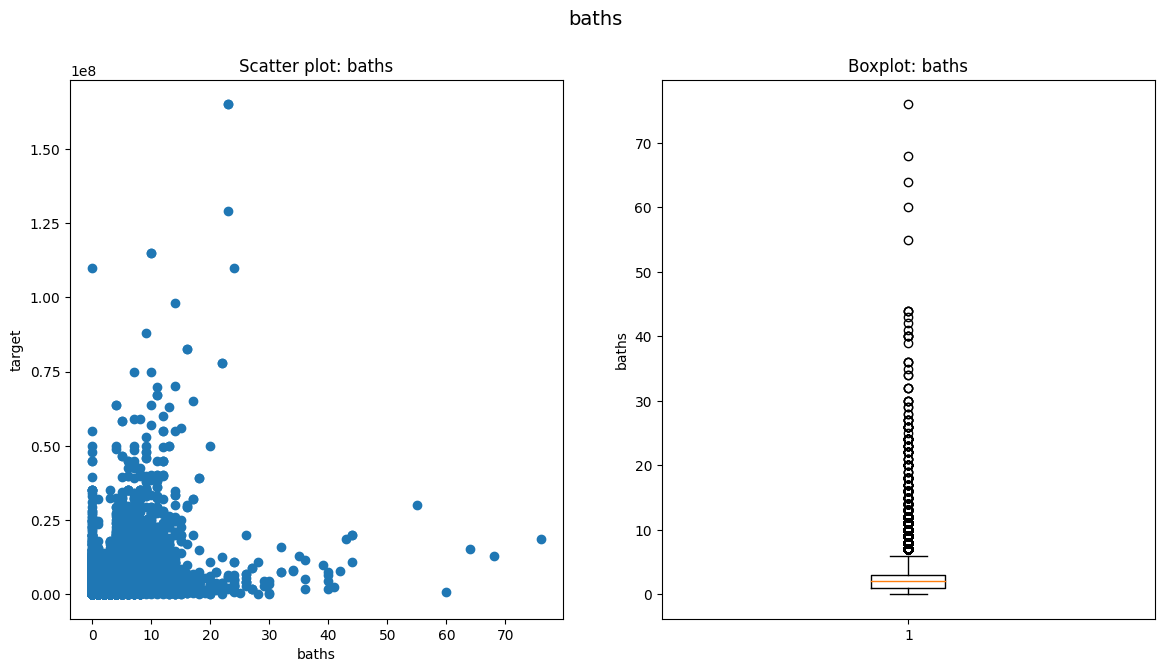

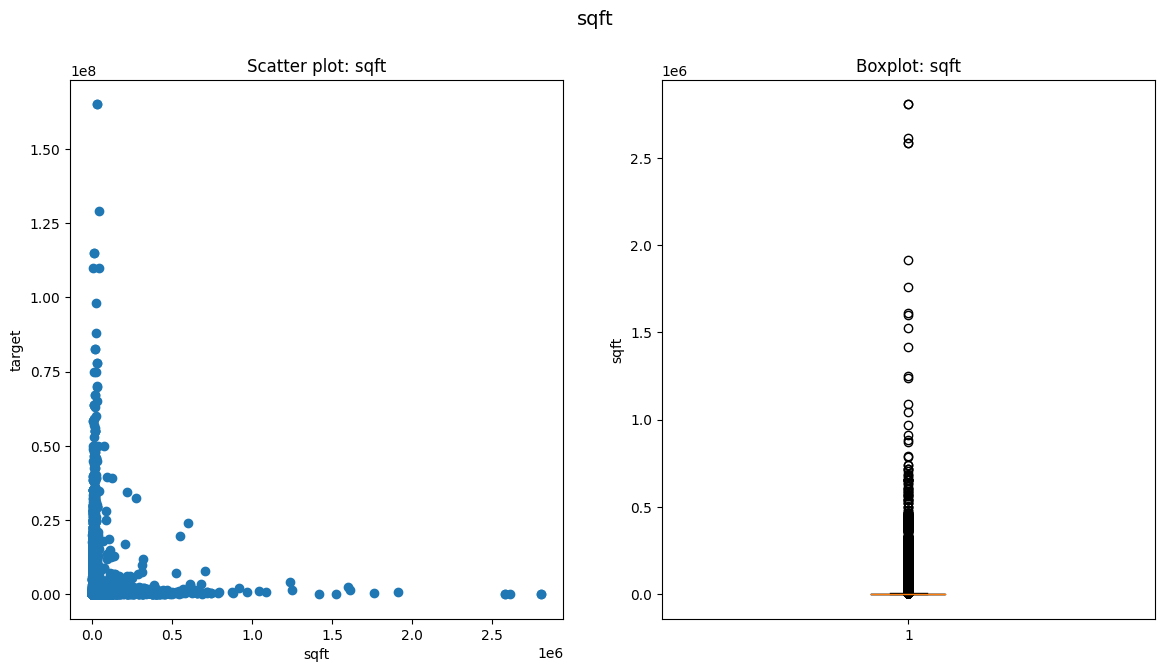

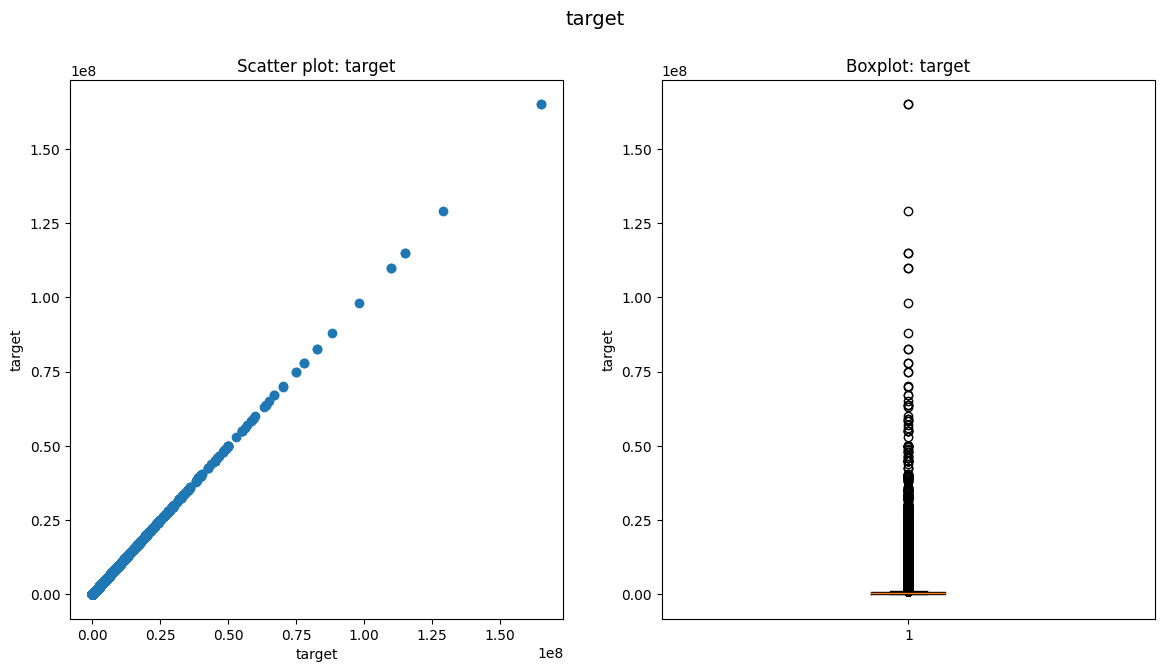

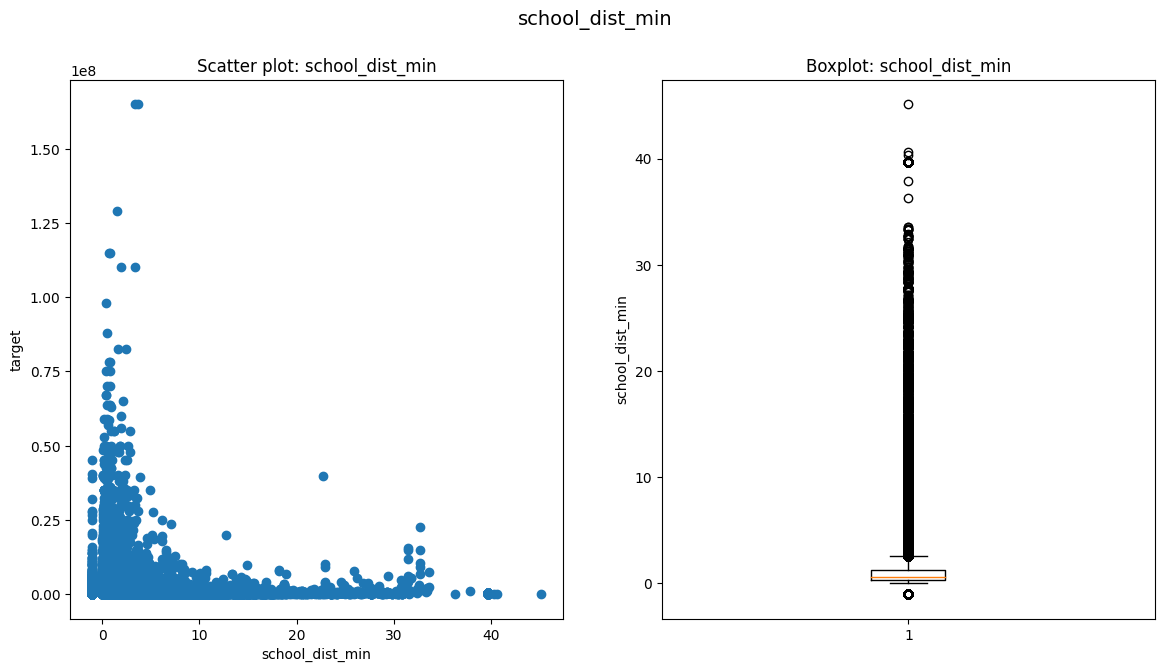

In [119]:
# Создание графика рассеивания и ящика с усами для каждого признака
for feature in num:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle(f'{feature}', fontsize=14)

    # График рассеивания
    ax1.scatter(data_c[feature], data_c['target'])
    ax1.set_title(f'Scatter plot: {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('target')

    # Ящик с усами
    ax2.boxplot(data_c[feature])
    ax2.set_title(f'Boxplot: {feature}')
    ax2.set_ylabel(feature)

    plt.show()

In [123]:
# Проверяем на мультиколлинеарность и корреляцию числовых признаков между собой. И с признаком 'target'
corr = data_c.corr()
corr.style.background_gradient(cmap='coolwarm')

,baths,sqft,target,Pool,school_dist_min
baths,1.000000,0.007870,0.328053,0.214837,0.051040
sqft,0.007870,1.000000,0.048997,0.006874,0.000365
target,0.328053,0.048997,1.000000,0.126407,-0.002360
Pool,0.214837,0.006874,0.126407,1.000000,0.060612
school_dist_min,0.051040,0.000365,-0.002360,0.060612,1.000000


Мультиколлинеарность отсутствует. Больше всего 'target' коррелирует с 'baths'.

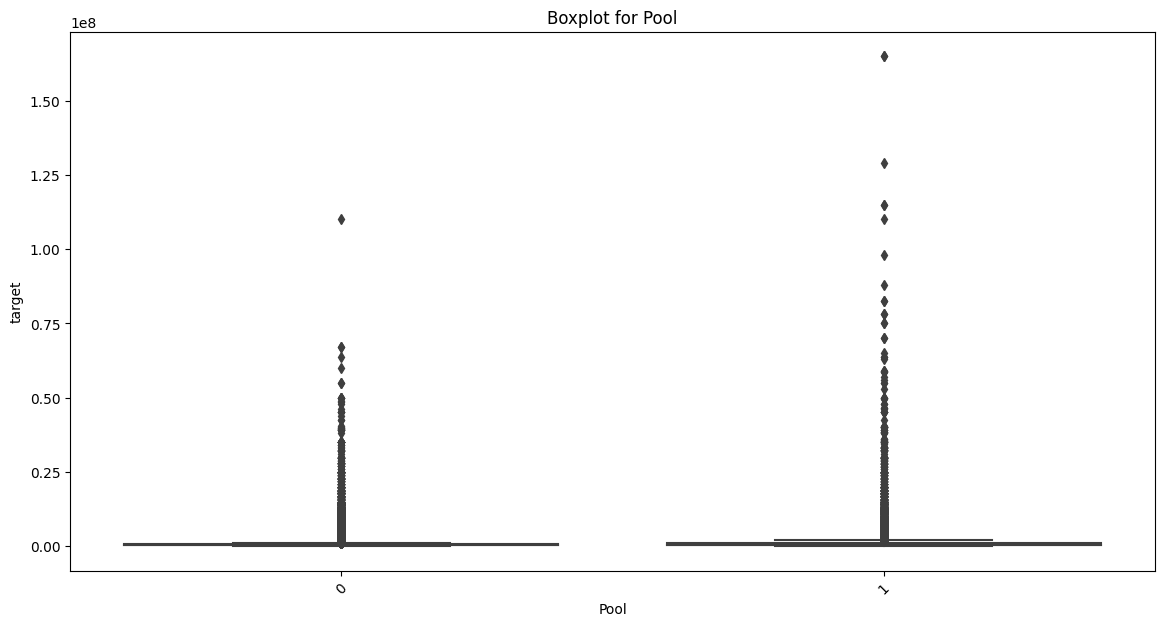

In [149]:

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14,7))
    sns.boxplot(x=column, y='target', 
                data = data_c,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
get_boxplot('Pool')

In [150]:
# функция для оценки распределения категориальных признаков в зависимости от целевой переменной
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14,7))
    sns.boxplot(x=column, y='target', 
                data=data_c.loc[data_c.loc[:, column].isin(data_c.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

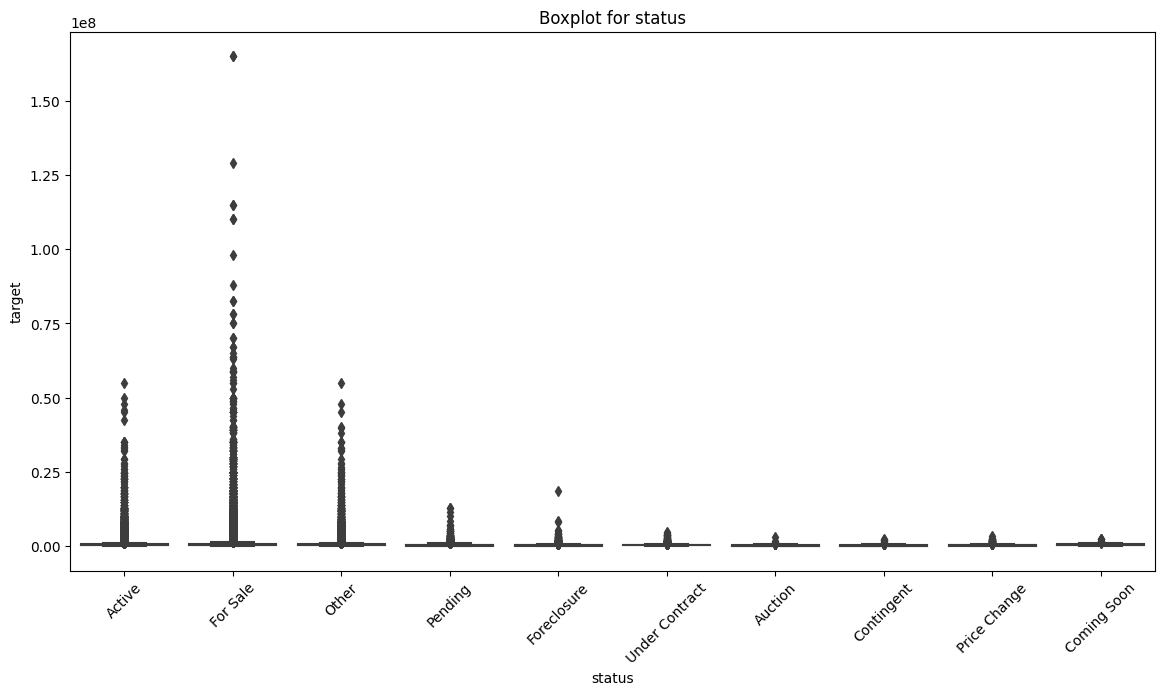

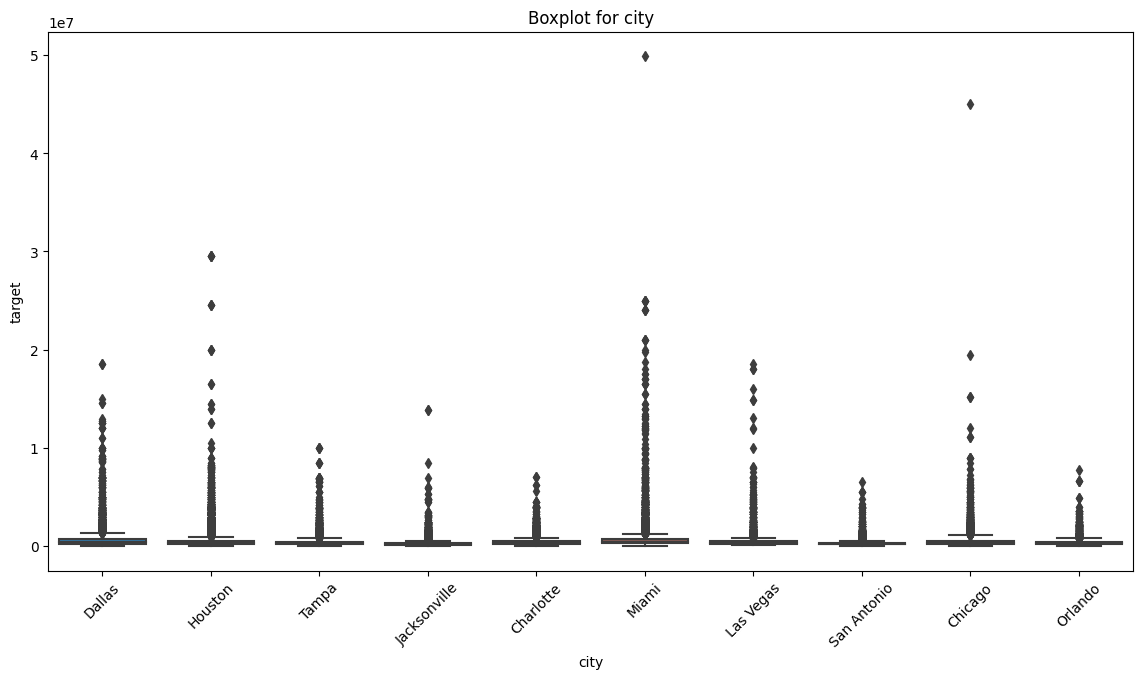

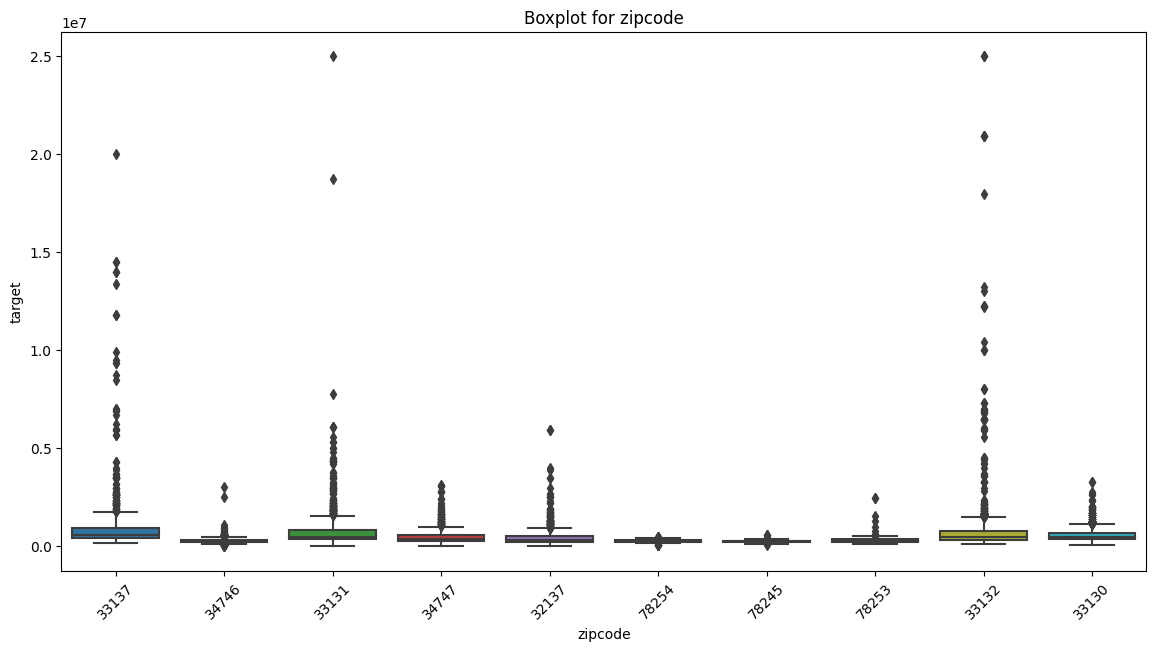

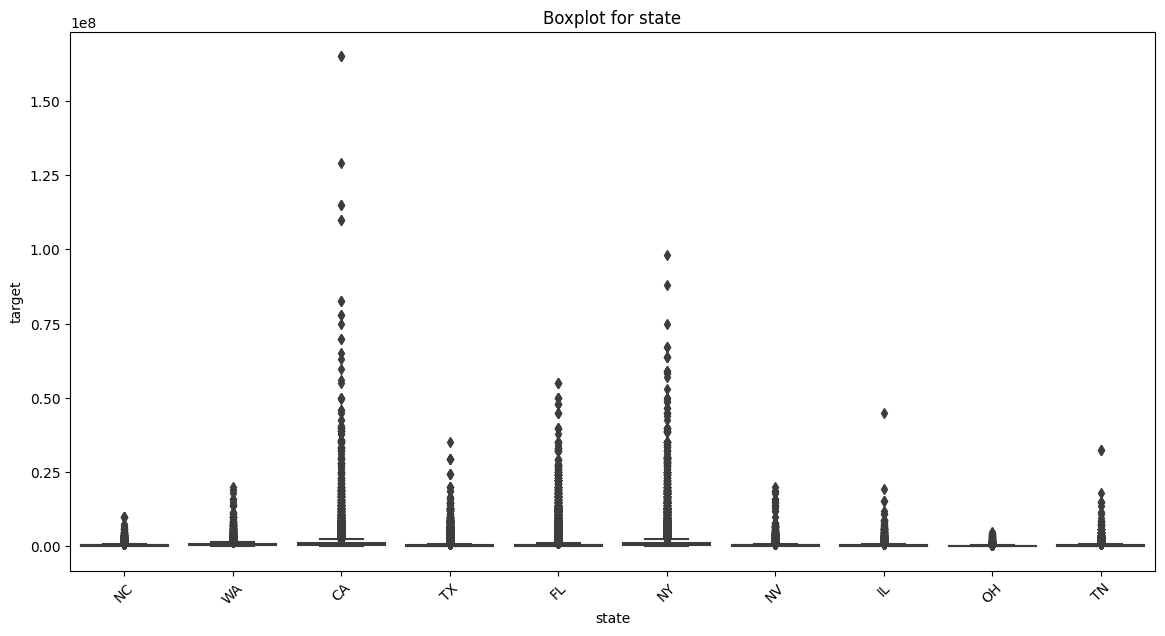

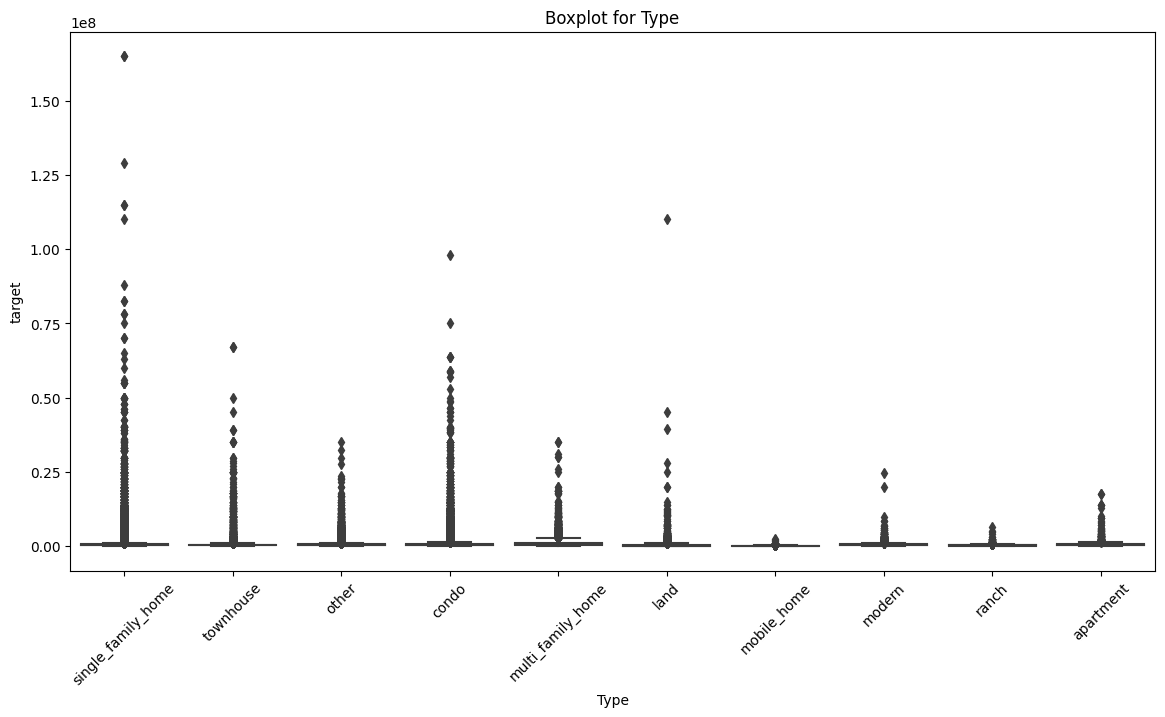

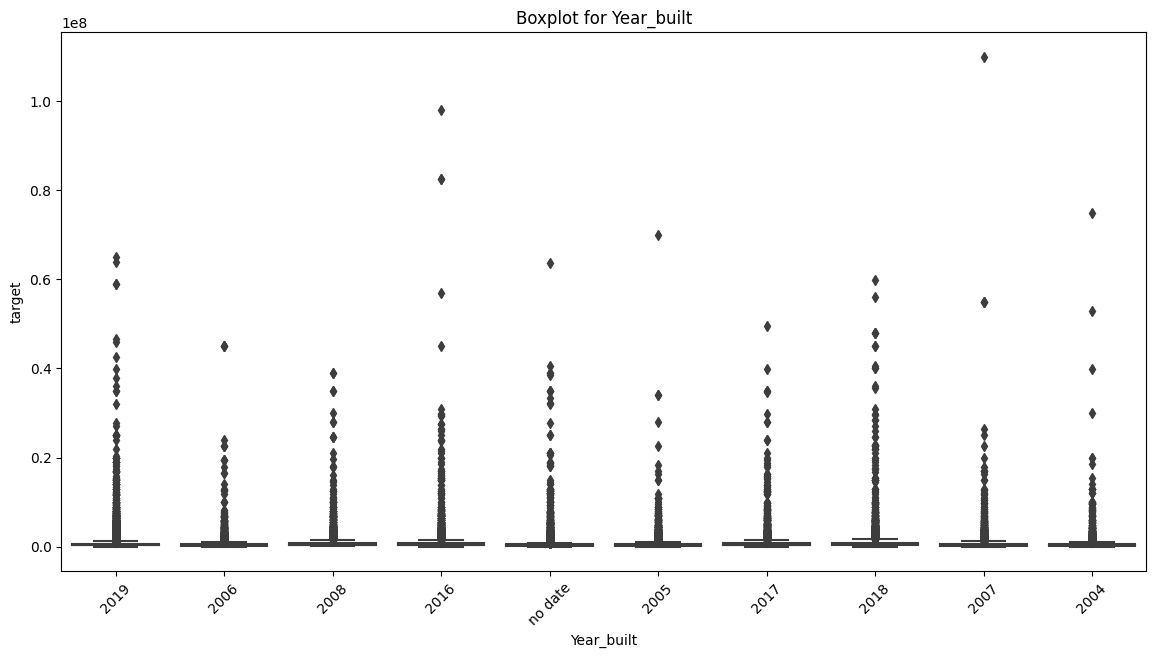

In [151]:
for col in cat:
    get_boxplot(col)

По графикам похоже, что все параметры, могут влиять на стоимость. Также можно заметить, много выбросов, но они оправданы, так как есть очень дорогие дома с огромной площадью.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения стоимости недвижимости по различным параметрам неразличимы:.

In [154]:
from scipy.stats import ttest_ind
import itertools

In [159]:
def get_stat_dif(column):
    cols = data_c.loc[:, column].value_counts().index[:10]
    combinations_all = list(itertools.combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data_c.loc[data_c.loc[:, column] == comb[0], 'target'], 
                        data_c.loc[data_c.loc[:, column] == comb[1], 'target']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [160]:
for col in cat:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки status
Найдены статистически значимые различия для колонки city
Найдены статистически значимые различия для колонки zipcode
Найдены статистически значимые различия для колонки state
Найдены статистически значимые различия для колонки Type
Найдены статистически значимые различия для колонки Year_built


In [162]:
get_stat_dif('Pool')

Найдены статистически значимые различия для колонки Pool


Видим что все признаки являются значимыми

In [228]:
data_c.info()
# Сохраним наши пред обработанные данные в CSV-файл
data_c.to_csv("C:\work_me_code\A_final\cleaned_data_CatBoostRegressor.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319736 entries, 0 to 330577
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           319736 non-null  object 
 1   baths            319736 non-null  float64
 2   city             319736 non-null  object 
 3   sqft             319736 non-null  int64  
 4   zipcode          319736 non-null  object 
 5   state            319736 non-null  object 
 6   target           319736 non-null  int64  
 7   Pool             319736 non-null  int64  
 8   Type             319736 non-null  object 
 9   Year_built       319736 non-null  object 
 10  school_dist_min  319736 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 37.3+ MB


In [218]:
#логарифмируем признаки
df = data_c.copy()
for column in ['baths', 'sqft', 'target', 'school_dist_min']:
        # Логорифмирование
        df[column] = df[column].apply(lambda x: abs(x))
        constant = 1e-6
        df[column] = np.log(df[column] + constant)

In [220]:
# загружаем библиотеку
one_hot_encoder = OneHotEncoder(drop = 'first')

# колонки к преобразованию
columns_to_change = ['status', 'state', 'Type']

# 'учим' кодировщик и сразу кодируем данные
data_onehot = one_hot_encoder.fit_transform(
    df[columns_to_change]
).toarray() # результат переводим в массив

# получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()

# составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns = column_names)

print('Количество новых бинарных столбцов:', data_onehot.shape[1])

Количество новых бинарных столбцов: 58


In [221]:
year_le = LabelEncoder()
year_ord = year_le.fit_transform(df['Year_built'])

city_le = LabelEncoder()
city_label = city_le.fit_transform(df['city'])

zip_le = LabelEncoder()
zip_label = zip_le.fit_transform(df['zipcode'])

df['year_ord'] = year_ord
df['city_label'] = city_label
df['zip_label'] = zip_label

In [222]:
#Добавим полученную таблицу с закодированными признаками:
df = pd.concat(
    [df.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot],
    axis=1
)


In [225]:
df = df.drop(['Year_built','zipcode','city'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319736 entries, 0 to 319735
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   baths                    319736 non-null  float64
 1   sqft                     319736 non-null  float64
 2   target                   319736 non-null  float64
 3   Pool                     319736 non-null  int64  
 4   school_dist_min          319736 non-null  float64
 5   year_ord                 319736 non-null  int32  
 6   city_label               319736 non-null  int32  
 7   zip_label                319736 non-null  int32  
 8   status_Auction           319736 non-null  float64
 9   status_Back on Market    319736 non-null  float64
 10  status_Closed            319736 non-null  float64
 11  status_Coming Soon       319736 non-null  float64
 12  status_Contingent        319736 non-null  float64
 13  status_For Rent          319736 non-null  float64
 14  stat

In [227]:
# Сохраним наши пред обработанные данные в CSV-файл
df.to_csv("C:\work_me_code\A_final\cleaned_data_2.csv", index=False)